#### Notebook 3

- Calculate ERA5 monthly mean/sum anomaly fields

In [1]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import rioxarray
import cartopy
import pyproj
import numpy as np

import util

##### Variable options

var_type:
- single or pressure (discarded)

var:
- single: t2m, prec
- pressure: t, relhum, geopotential

In [21]:
var_type = 'single'
var = 'prec'
var = util.era_field_map[var]
start_date = '2008-06-01'
end_date = '2009-02-28'
save_path = 'data/post_processed/'

In [3]:
prepath = fr'data/era5/'
data_name = fr'era5_monthly_project_data_climate_modeling.nc'
ds_era = xr.open_dataset(prepath + data_name)

In [4]:
print(ds_era.time[0].values)
print(ds_era.time[-1].values)

1979-01-01T00:00:00.000000000
2021-12-01T00:00:00.000000000


In [5]:
month_array = ds_era['tp'].time.dt.daysinmonth
len(month_array)

516

In [6]:
ds_era['tp'] = ds_era['tp'] * month_array * 1000 # m to mm for precipitation; 

##### Calculate Monthly Anomalies

In [7]:
ds_era_climatology = util.get_era_climatology(ds_era, '1979-01-01', 
                                              '2021-12-01', cli_type='month')

ds_era_sliced_climatology = util.get_era_climatology(ds_era, start_date, 
                                                     end_date, cli_type='month')

In [8]:
ds_monthly_anomaly = (ds_era_sliced_climatology - ds_era_climatology)

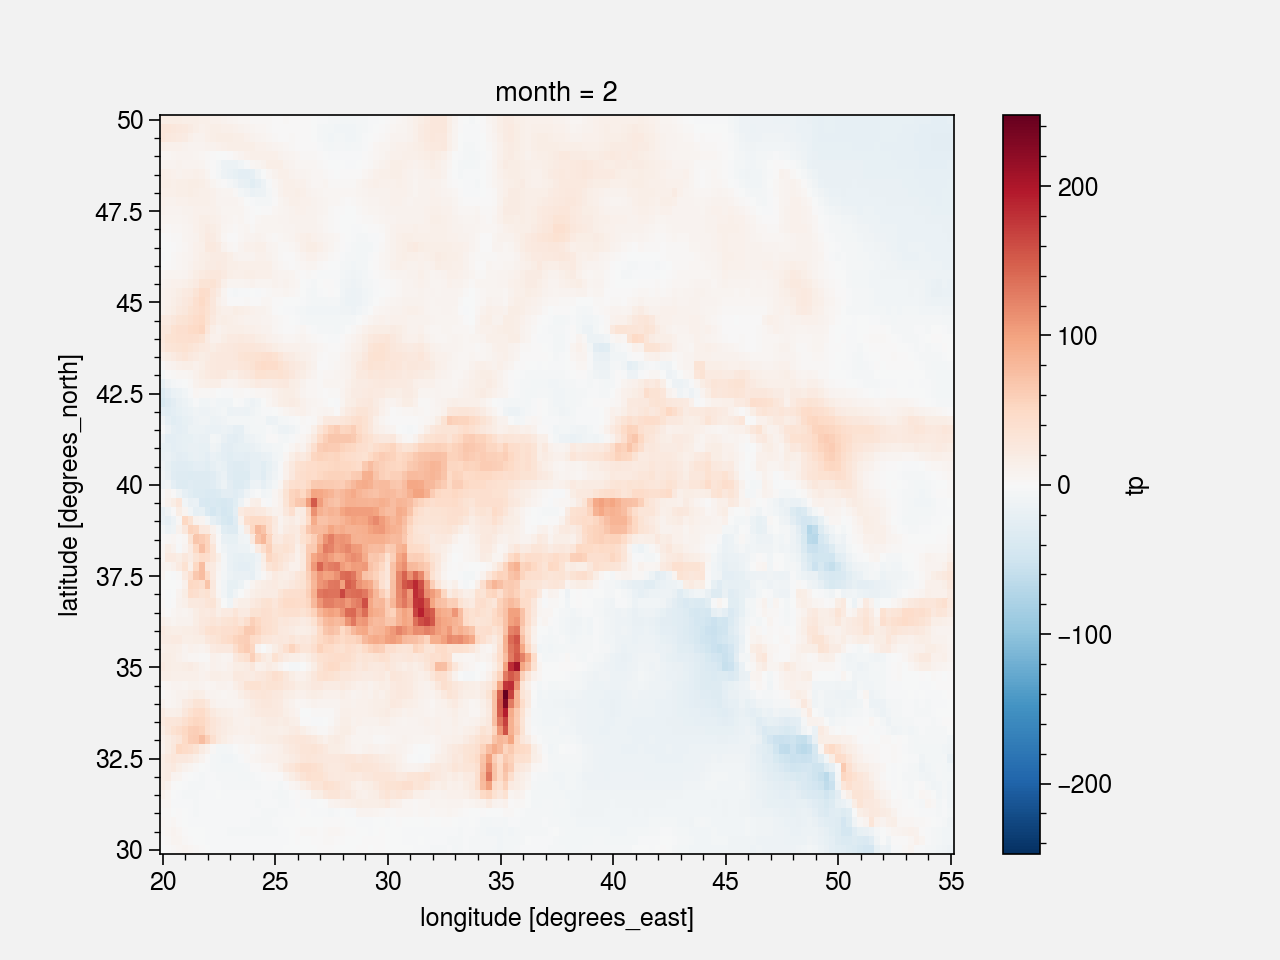

In [12]:
ds_monthly_anomaly[var].sel(month=2).plot()

In [13]:
anom_type = 'monthly'
util.save_anom_file(ds_monthly_anomaly, save_path, anom_type)

'era_monthly_anomaly.nc created'

##### Calculate Seasonal Anomalies

In [14]:
ds_era_climatology = util.get_era_climatology(ds_era, '1979-01-01', 
                                              '2021-12-01', cli_type='season')

ds_era_sliced_climatology = util.get_era_climatology(ds_era, start_date, 
                                                     end_date, cli_type='season')

In [15]:
ds_era_sliced_climatology.season.values

array(['DJF', 'JJA', 'SON'], dtype=object)

In [16]:
ds_seasonal_anomaly = (ds_era_sliced_climatology - ds_era_climatology)

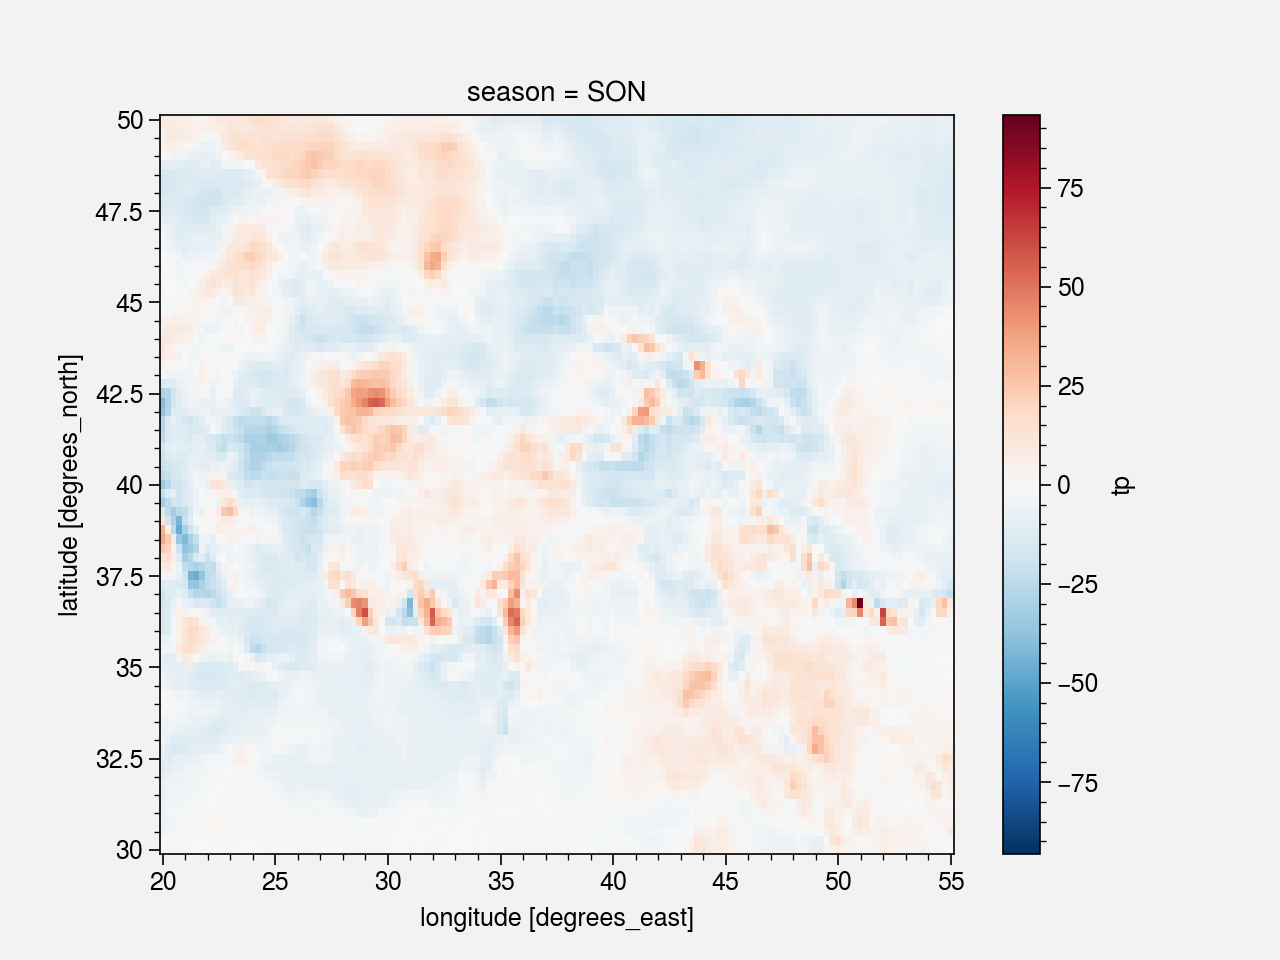

In [19]:
ds_seasonal_anomaly.sel(season='SON')[var].plot()

In [20]:
anom_type = 'seasonal'
util.save_anom_file(ds_seasonal_anomaly, save_path, anom_type)

'era_seasonal_anomaly.nc created'